<a href="https://colab.research.google.com/github/cesargar1507/DatasetsUB/blob/main/M7_AI2_GarciaCesar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

**USO DE TENSORFLOW**

In [51]:
# Cargar los datos CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

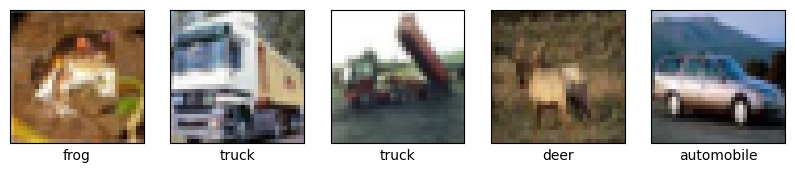

In [52]:
# Etiquetas de las clases en CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Visualizar una muestra de datos
def plot_sample_images(x, y, class_names, num_samples=5):
    plt.figure(figsize=(10, 2))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(x[i])
        plt.xlabel(class_names[y[i][0]])
    plt.show()

# Mostrar las primeras 5 imágenes de entrenamiento
plot_sample_images(x_train, y_train, class_names)

In [53]:
# Preparar los datos CIFAR-10
x_train, x_test = x_train / 255.0, x_test / 255.0

In [54]:
# Dividir datos en entrenamiento y validación
x_train, x_val = x_train[:40000], x_train[40000:]
y_train, y_val = y_train[:40000], y_train[40000:]

In [55]:
# Crear el modelo
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10),
    Softmax()
])

In [56]:
# Imprimir el resumen del modelo
model.summary()

# Verificar con un lote de datos
x_sample = tf.random.normal([1, 32, 32, 3])
y_sample = model(x_sample)
print("Output shape:", y_sample.shape)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_15 (Dense)            (None, 128)               393344    
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dense_17 (Dense)            (None, 10)                650       
                                                                 
 softmax_1 (Softmax)         (None, 10)                0         
                                                                 
Total params: 402250 (1.53 MB)
Trainable params: 402250 (1.53 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Output shape: (1, 

In [57]:
# Compilar el modelo
model.compile(optimizer=SGD(),
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [58]:
# Entrenar el modelo
history = model.fit(x_train, y_train, epochs=100, batch_size=16,
                    validation_data=(x_val, y_val))

Epoch 1/100
2500/2500 [==============================] - 13s 5ms/step - loss: 1.8956 - accuracy: 0.3126 - val_loss: 1.7944 - val_accuracy: 0.3577
Epoch 2/100
2500/2500 [==============================] - 12s 5ms/step - loss: 1.7081 - accuracy: 0.3877 - val_loss: 1.7015 - val_accuracy: 0.3964
Epoch 3/100
2500/2500 [==============================] - 12s 5ms/step - loss: 1.6334 - accuracy: 0.4171 - val_loss: 1.6253 - val_accuracy: 0.4266
Epoch 4/100
2500/2500 [==============================] - 11s 4ms/step - loss: 1.5765 - accuracy: 0.4401 - val_loss: 1.5993 - val_accuracy: 0.4297
Epoch 5/100
2500/2500 [==============================] - 12s 5ms/step - loss: 1.5344 - accuracy: 0.4496 - val_loss: 1.6050 - val_accuracy: 0.4299
Epoch 6/100
2500/2500 [==============================] - 12s 5ms/step - loss: 1.4994 - accuracy: 0.4641 - val_loss: 1.5399 - val_accuracy: 0.4534
Epoch 7/100
2500/2500 [==============================] - 12s 5ms/step - loss: 1.4729 - accuracy: 0.4759 - val_loss: 1.5219 -

In [59]:
# Evaluar el modelo en los datos de test
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 1s - loss: 1.8672 - accuracy: 0.5086 - 919ms/epoch - 3ms/step
Test accuracy: 0.5085999965667725


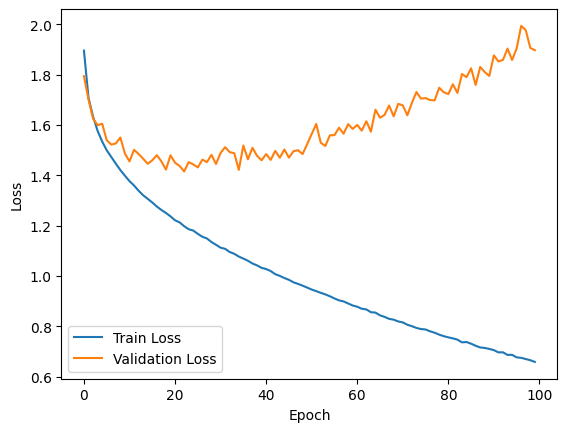

In [60]:
# Graficar curvas de pérdida
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

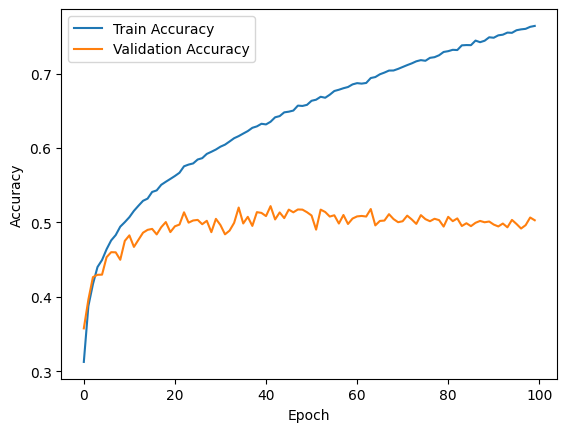

In [61]:
# Graficar curvas de accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**USO DE PYTORCH**

In [62]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import numpy as np

In [63]:
# Transformaciones y carga de datos CIFAR-10
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
train_val_data = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_data = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [64]:
# Dividir datos en entrenamiento y validación
train_size = int(0.8 * len(train_val_data))
val_size = len(train_val_data) - train_size
train_data, val_data = random_split(train_val_data, [train_size, val_size])

train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
val_loader = DataLoader(val_data, batch_size=16, shuffle=False)
test_loader = DataLoader(test_data, batch_size=16, shuffle=False)

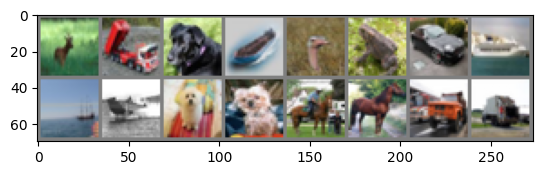

deer  truck dog   ship  bird  frog  car   ship  ship  ship  dog   dog   horse horse truck truck


In [65]:
# Etiquetas de las clases en CIFAR-10
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Función para desnormalizar las imágenes y mostrar
def imshow(img):
    img = img / 2 + 0.5  # Desnormalizar
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Obtener un lote de imágenes del conjunto de entrenamiento
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Mostrar imágenes
imshow(torchvision.utils.make_grid(images))

# Imprimir las etiquetas
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(16)))

In [66]:
# Definir la red neuronal
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(32*32*3, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = SimpleNN()

In [67]:
# Imprimir el resumen del modelo
summary(model, (3, 32, 32))

# Verificar con un lote de datos
x_sample = torch.randn(1, 3, 32, 32)
y_sample = model(x_sample)
print("Output shape:", y_sample.shape)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                 [-1, 3072]               0
            Linear-2                  [-1, 128]         393,344
            Linear-3                   [-1, 64]           8,256
            Linear-4                   [-1, 10]             650
Total params: 402,250
Trainable params: 402,250
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.02
Params size (MB): 1.53
Estimated Total Size (MB): 1.57
----------------------------------------------------------------
Output shape: torch.Size([1, 10])


In [68]:
# Definir el optimizador y la función de pérdida
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [69]:
# Función de entrenamiento
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=100):
    train_losses, val_losses = [], []
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        train_losses.append(running_loss / len(train_loader))

        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        val_losses.append(val_loss / len(val_loader))
        val_accuracy = 100 * correct / total
        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, Val Accuracy: {val_accuracy:.2f}%")
    return train_losses, val_losses

In [70]:
# Entrenar el modelo
train_losses, val_losses = train_model(model, train_loader, val_loader, criterion, optimizer)

Epoch 1/100, Train Loss: 1.8577, Val Loss: 1.6674, Val Accuracy: 41.13%
Epoch 2/100, Train Loss: 1.5833, Val Loss: 1.5658, Val Accuracy: 44.63%
Epoch 3/100, Train Loss: 1.4754, Val Loss: 1.5081, Val Accuracy: 46.89%
Epoch 4/100, Train Loss: 1.4007, Val Loss: 1.4498, Val Accuracy: 49.31%
Epoch 5/100, Train Loss: 1.3369, Val Loss: 1.4361, Val Accuracy: 49.32%
Epoch 6/100, Train Loss: 1.2866, Val Loss: 1.4287, Val Accuracy: 49.11%
Epoch 7/100, Train Loss: 1.2401, Val Loss: 1.4170, Val Accuracy: 50.49%
Epoch 8/100, Train Loss: 1.1983, Val Loss: 1.3916, Val Accuracy: 51.38%
Epoch 9/100, Train Loss: 1.1570, Val Loss: 1.4149, Val Accuracy: 51.35%
Epoch 10/100, Train Loss: 1.1218, Val Loss: 1.4301, Val Accuracy: 51.19%
Epoch 11/100, Train Loss: 1.0870, Val Loss: 1.4309, Val Accuracy: 51.22%
Epoch 12/100, Train Loss: 1.0559, Val Loss: 1.4038, Val Accuracy: 52.07%
Epoch 13/100, Train Loss: 1.0230, Val Loss: 1.4146, Val Accuracy: 52.41%
Epoch 14/100, Train Loss: 0.9959, Val Loss: 1.4300, Val Accu

In [71]:
# Evaluar el modelo en los datos de test
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f"Test Accuracy: {test_accuracy:.2f}%")

Test Accuracy: 48.57%


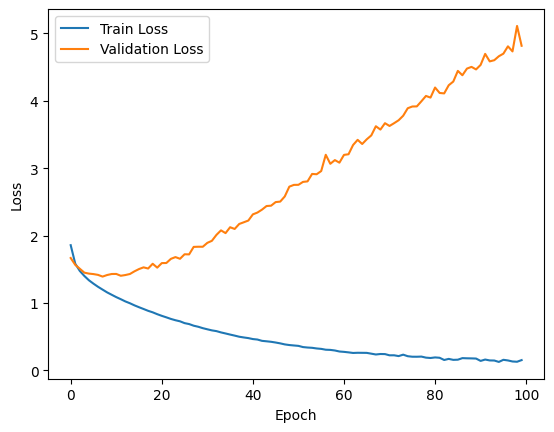

In [72]:
# Graficar curvas de pérdida
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()